In [ ]:
from main import *
from main import GenericOptimizer
from sklearn.preprocessing import MinMaxScaler
from pymoo.indicators.hv import HV

datasets_path = "Datasets"
save_path = "_runs"

iteration_mappings = {}
for file in os.listdir(save_path):
	execution_name = '_'.join(file.replace('.pickle', '').split('_')[1:])
	if execution_name not in iteration_mappings:
		iteration_mappings[execution_name] = []
	iteration_mappings[execution_name].append(file)

In [7]:
result_dict = None
for execution_name in iteration_mappings:
	for filename in iteration_mappings[execution_name]:
		with open(os.path.join(save_path, filename), 'rb') as fh:
			result_dict = pickle.load(fh)
		break
	break

result = result_dict['result']
print(result_dict['name'])

0_autoEncoderMutation_australian


In [23]:
F = []
for problem in result.history:
    print(problem.__dir__())
    print(problem.pop.get("F"))
    break

['problem', 'termination', 'output', 'archive', 'display', 'callback', 'return_least_infeasible', 'save_history', 'verbose', 'seed', 'evaluator', 'history', 'pop', 'off', 'opt', 'n_iter', 'data', 'is_initialized', 'start_time', 'pop_size', 'advance_after_initial_infill', 'survival', 'n_offsprings', 'eliminate_duplicates', 'repair', 'initialization', 'mating', 'tournament_type', '__module__', '__firstlineno__', '__init__', '_set_optimum', '__static_attributes__', '__doc__', '_initialize_infill', '_initialize_advance', '_infill', '_advance', 'setup', 'run', 'has_next', 'finalize', 'next', '_initialize', 'infill', 'advance', 'result', 'ask', 'tell', '_post_advance', '_setup', '_finalize', 'n_gen', '__dict__', '__weakref__', '__new__', '__repr__', '__hash__', '__str__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__reduce_ex__', '__reduce__', '__getstate__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__

In [ ]:
metric = Hypervolume(ref_point= np.array([1.0, 1.0]),
					 norm_ref_point=False,
					 zero_to_one=True,
					 ideal=result.opt.get("F").min(axis=0),
					 nadir=result.opt.get("F").max(axis=0))

In [ ]:
n_evals = []
hist_cv = []
hist_cv_avg = []
hist_F = []
problem = result.problem

for algo in result.history:
	# store the number of function evaluations
	n_evals.append(algo.evaluator.n_eval)

	# retrieve the optimum from the algorithm
	opt = algo.opt

	# store the least contraint violation and the average in each population
	hist_cv.append(opt.get("CV").min())
	hist_cv_avg.append(algo.pop.get("CV").mean())

	# filter out only the feasible and append and objective space values
	feas = np.where(opt.get("feasible"))[0]
	hist_F.append(opt.get("F")[feas])

AttributeError: 'Population' object has no attribute 'x_train'

: 

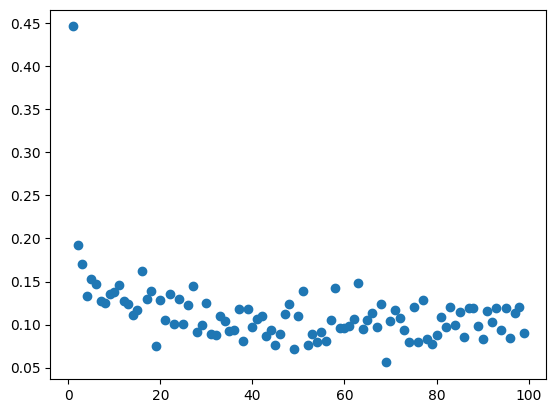

In [11]:
plt.scatter(list(problem.mutation_history.keys()), [np.mean(problem.mutation_history[gen]) for gen in problem.mutation_history])
plt.show()

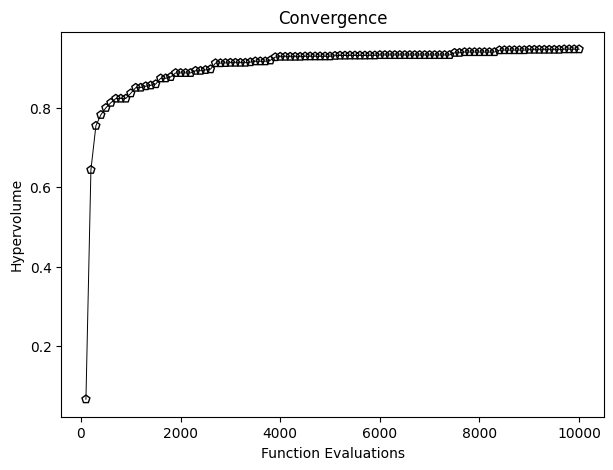

In [12]:
hv = [metric.do(_F) for _F in hist_F]

plt.figure(figsize=(7, 5))
plt.plot(n_evals, hv,  color='black', lw=0.7, label="Avg. CV of Pop")
plt.scatter(n_evals, hv,  facecolor="none", edgecolor='black', marker="p")
plt.title("Convergence")
plt.xlabel("Function Evaluations")
plt.ylabel("Hypervolume")
plt.show()

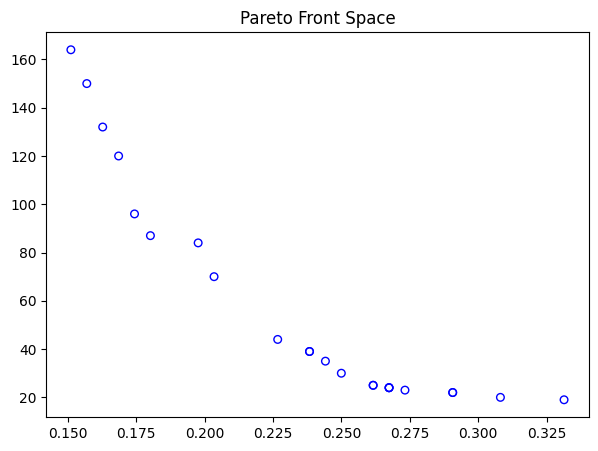

In [14]:
plt.figure(figsize=(7, 5))
plt.scatter(result.F[:, 0], result.F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Pareto Front Space")
plt.show()